In [1]:
from sympy import *
init_printing()

from sympy import Matrix
from sympy.physics.quantum import TensorProduct
#%pylab inline
import numpy as np
import matplotlib.pyplot as plt

In [120]:
(alpha,beta,gamma,delta,eta)=symbols('alpha,beta,gamma,delta,eta')
(alpha_1,beta_1,alpha_2,beta_2)=symbols('alpha_1,beta_1,alpha_2,beta_2')

## Egyfoton-állapotok

$\mid H \rangle = \left[\begin{matrix}1\\0\end{matrix}\right], \ \mid V \rangle =  \left[\begin{matrix}0\\1\end{matrix}\right]$


In [121]:
state_0=Matrix([[1],[0]])
state_1=Matrix([[0],[1]])
state_random=Matrix([[alpha],[beta]])

## Polárszűrők X, Y, +45°, -45°
$P_X= \left[\begin{matrix}1 & 0\\0 & 0\end{matrix}\right], \ P_Y\left[\begin{matrix}0 & 0\\0 & 1\end{matrix}\right], \  P_{+45}\left[\begin{matrix}0.5 & -0.5\\-0.5 & 0.5\end{matrix}\right], \  P_{-45}\left[\begin{matrix}0.5 & 0.5\\0.5 & 0.5\end{matrix}\right]$

In [122]:
Polar_X=Matrix([[1,0],[0,0]])
Polar_Y=Matrix([[0,0],[0,1]])
Polar_45p=Matrix([[1/2,-1/2],[-1/2,1/2]])
Polar_45m=Matrix([[1/2,1/2],[1/2,1/2]])

## Forgatás tetszőleges szöggel

In [123]:
rotator=Matrix([[cos(gamma),-sin(gamma)],[sin(gamma),cos(gamma)]])
rotator

⎡cos(γ)  -sin(γ)⎤
⎢               ⎥
⎣sin(γ)  cos(γ) ⎦

## X komponens mérése
$ \left[\begin{matrix}1 & 0\\0 & 0\end{matrix}\right] \left[\begin{matrix}\alpha\\\beta\end{matrix}\right] = \left[\begin{matrix}\alpha\\0\end{matrix}\right]$, a detektor az amplitudó négyzetet méri: $ \mid \alpha \mid ^2 $ -et.

In [124]:
(Polar_X@state_random).norm()**2

## Tetszőleges irányban álló polárszűrő

In [149]:
polar=rotator@Polar_X@rotator.subs(gamma,-gamma)
print(latex(polar.subs(gamma,alpha)))

\left[\begin{matrix}\cos^{2}{\left(\alpha \right)} & \sin{\left(\alpha \right)} \cos{\left(\alpha \right)}\\\sin{\left(\alpha \right)} \cos{\left(\alpha \right)} & \sin^{2}{\left(\alpha \right)}\end{matrix}\right]


## A kétfotonos $ \mid HV \rangle $ állapot a $\mid H \rangle_1 \otimes \mid V \rangle_2$ tenzorszorzatként írható fel:

In [126]:
s01=TensorProduct(state_0,state_1)
s01

⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

Ha az egyik foton útjába egy $\alpha$, a másik útjába egy $\beta$ szögbe forgatott polárszűrőt helyezünk, akkor a kétfoton állapotra a két megfelelő Jones-mátrix tenzorszorzatát kell hattatni.

In [150]:
print(latex(TensorProduct(polar.subs(gamma,alpha),polar.subs(gamma,beta))))
TensorProduct(polar.subs(gamma,alpha),polar.subs(gamma,beta))

\left[\begin{matrix}\cos^{2}{\left(\alpha \right)} \cos^{2}{\left(\beta \right)} & \sin{\left(\beta \right)} \cos^{2}{\left(\alpha \right)} \cos{\left(\beta \right)} & \sin{\left(\alpha \right)} \cos{\left(\alpha \right)} \cos^{2}{\left(\beta \right)} & \sin{\left(\alpha \right)} \sin{\left(\beta \right)} \cos{\left(\alpha \right)} \cos{\left(\beta \right)}\\\sin{\left(\beta \right)} \cos^{2}{\left(\alpha \right)} \cos{\left(\beta \right)} & \sin^{2}{\left(\beta \right)} \cos^{2}{\left(\alpha \right)} & \sin{\left(\alpha \right)} \sin{\left(\beta \right)} \cos{\left(\alpha \right)} \cos{\left(\beta \right)} & \sin{\left(\alpha \right)} \sin^{2}{\left(\beta \right)} \cos{\left(\alpha \right)}\\\sin{\left(\alpha \right)} \cos{\left(\alpha \right)} \cos^{2}{\left(\beta \right)} & \sin{\left(\alpha \right)} \sin{\left(\beta \right)} \cos{\left(\alpha \right)} \cos{\left(\beta \right)} & \sin^{2}{\left(\alpha \right)} \cos^{2}{\left(\beta \right)} & \sin^{2}{\left(\alpha \right)} \sin{\left

⎡         2       2                        2                                  
⎢      cos (α)⋅cos (β)           sin(β)⋅cos (α)⋅cos(β)        sin(α)⋅cos(α)⋅co
⎢                                                                             
⎢             2                        2       2                              
⎢   sin(β)⋅cos (α)⋅cos(β)           sin (β)⋅cos (α)        sin(α)⋅sin(β)⋅cos(α
⎢                                                                             
⎢                    2                                              2       2 
⎢   sin(α)⋅cos(α)⋅cos (β)     sin(α)⋅sin(β)⋅cos(α)⋅cos(β)        sin (α)⋅cos (
⎢                                                                             
⎢                                          2                     2            
⎣sin(α)⋅sin(β)⋅cos(α)⋅cos(β)     sin(α)⋅sin (β)⋅cos(α)        sin (α)⋅sin(β)⋅c

 2                                   ⎤
s (β)     sin(α)⋅sin(β)⋅cos(α)⋅cos(β)⎥
                                     ⎥
             

Mennyi lesz ilyenkor a mérés várható értéke, a fentebb definiált $\mid HV \rangle$ állapotra?

# papíron kitalálhatjátok, aztán itt ellenőrízhetitek!

In [167]:
(s01.T@TensorProduct(polar.subs(gamma,alpha),polar.subs(gamma,beta))@s01)[0].simplify()

## Definiáljuk a $ \Phi_+ = \frac{1}{\sqrt{2}} \mid HH \rangle + \frac{1}{\sqrt{2}} \mid VV \rangle$ Bell-állapotot!

In [128]:
bell_phi_plusz=(TensorProduct(state_0,state_0)+TensorProduct(state_1,state_1))/sqrt(2)
bell_phi_plusz

⎡√2⎤
⎢──⎥
⎢2 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢√2⎥
⎢──⎥
⎣2 ⎦

# Az alább definiált eab(alpha,beta,state) függvény kiszámolja az $\mathbf{E}(AB)$ várható értéket! 
+ bemenetként a két bázis irányát (Alice majd Bob választását), illetve  
+ a harmadék paraméterként, hogy milyen állapotra akarjuk kiszámolni a várható értéket!


In [129]:
def eab(alpha,beta,state):
    Npp=(state.T@TensorProduct(polar.subs(gamma,alpha),polar.subs(gamma,beta))@state)[0].simplify()
    Npm=(state.T@TensorProduct(polar.subs(gamma,alpha),polar.subs(gamma,beta+pi/2))@state)[0].simplify()
    Nmp=(state.T@TensorProduct(polar.subs(gamma,alpha+pi/2),polar.subs(gamma,beta))@state)[0].simplify()
    Nmm=(state.T@TensorProduct(polar.subs(gamma,alpha+pi/2),polar.subs(gamma,beta+pi/2))@state)[0].simplify()
    return(Npp-Npm-Nmp+Nmm)/(Npp+Npm+Nmp+Nmm)


# További feladatok, a mérés kiértékeléséhez szükséges!
+ definiáljuk a chsh() függvény(eke)t, hogy az $S,\bar{S}$ paramétereket ki tudja számolni!
+ Definiáljuk a többi Bell-állapotot!
+ állapítsuk meg, hogy melyik Bell-állapot hova esik az $S,\bar{S}$ koordinátarendszerben a jegyzetben leírt szokásos bázis választás mellett!
+ a kapott eredmény segítségével tudjuk megállapítani, hogy a labormérés során melyik Bell-állapotot preparáltuk!

In [130]:
bell_phi_plus=(TensorProduct(state_0,state_0)+TensorProduct(state_1,state_1))/sqrt(2)
bell_phi_minus=(TensorProduct(state_0,state_0)-TensorProduct(state_1,state_1))/sqrt(2)
bell_psi_plus=(TensorProduct(state_0,state_1)+TensorProduct(state_1,state_0))/sqrt(2)
bell_psi_minus=(TensorProduct(state_0,state_1)-TensorProduct(state_1,state_0))/sqrt(2)



In [131]:
display(bell_phi_plus)
display(bell_phi_minus)
display(bell_psi_plus)
bell_psi_minus

⎡√2⎤
⎢──⎥
⎢2 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢√2⎥
⎢──⎥
⎣2 ⎦

⎡ √2 ⎤
⎢ ── ⎥
⎢ 2  ⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢ 0  ⎥
⎢    ⎥
⎢-√2 ⎥
⎢────⎥
⎣ 2  ⎦

⎡0 ⎤
⎢  ⎥
⎢√2⎥
⎢──⎥
⎢2 ⎥
⎢  ⎥
⎢√2⎥
⎢──⎥
⎢2 ⎥
⎢  ⎥
⎣0 ⎦

⎡ 0  ⎤
⎢    ⎥
⎢ √2 ⎥
⎢ ── ⎥
⎢ 2  ⎥
⎢    ⎥
⎢-√2 ⎥
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎣ 0  ⎦

In [143]:
state=bell_phi_plus
(state.T@TensorProduct(polar.subs(gamma,alpha),polar.subs(gamma,beta))@state)[0].simplify()

In [145]:
Epp= eab(0,112.5,bell_phi_plus)
Epp

def CSSH2(alphaa,betaa,state):
    Ea=[]
    for i in range(4):
        Ea.append(eab(alpha,beta,state).subs(alpha,alphaa[i]).subs(beta,betaa[i]))
    S=Ea[0]-Ea[1]+Ea[2]+Ea[3]
    Svonal=Ea[0]-Ea[1]-Ea[2]-Ea[3]
    print(Ea)
    return S.simplify(), Svonal.simplify()

aaa=[0,0,pi/4,pi/4]
#bbb=[np.deg2rad(22.5),np.deg2rad(22.5),np.deg2rad(67.5),np.deg2rad(67.5)]
bbb=[pi/8,3*pi/8,pi/8,3*pi/8]
Spp,Svpp=CSSH2(aaa,bbb,bell_phi_plus)
Spm,Svpm=CSSH2(aaa,bbb,bell_phi_minus)
Ssp,Svsp=CSSH2(aaa,bbb,bell_psi_plus)
Ssm,Svsm=CSSH2(aaa,bbb,bell_psi_minus)
print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA")
display(Spp)
display(Svpp)
display(Spm)
display(Svpm)
display(Ssp)
display(Svsp)
display(Ssm)
display(Svsm)

[sqrt(2)/2, -sqrt(2)/2, sqrt(2)/2, sqrt(2)/2]
[sqrt(2)/2, -sqrt(2)/2, -sqrt(2)/2, -sqrt(2)/2]
[-sqrt(2)/2, sqrt(2)/2, sqrt(2)/2, sqrt(2)/2]
[-sqrt(2)/2, sqrt(2)/2, -sqrt(2)/2, -sqrt(2)/2]
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA


## Bónusz feladat, a méréshez nem szükséges!

+ Az $\mid \Psi \rangle = \sqrt{\eta} \mid HH \rangle + \sqrt{1-\eta} \mid VV \rangle$ az $\eta$ értékétől függően általában egy nem teljesen összefont állapotot ír le (pl. $\eta=1/4$ esetén a jegyzetben is szereplőt).
+ Az állítás az, hogy mindig található olyan bázis, amelyben az adott állapot sérti a Bell-egyenlőtlenségeket! Találjuk meg / adjunk receptet a megtalálására!
+ Mutassuk meg $\eta=10^{-3}$ esetén, hogy a recept működik!

In [30]:
alpha, beta, in1, in2, coin = np.loadtxt("feladat4", unpack = True)

In [31]:
for i in range(len(alpha)):
    print(r'{} & {} & {} \\'.format(alpha[i],beta[i],coin[i]))

0.0 & 22.0 & 5538.0 \\
0.0 & 112.0 & 14277.0 \\
90.0 & 22.0 & 10185.0 \\
90.0 & 112.0 & 4682.0 \\
45.0 & 22.0 & 1463.0 \\
45.0 & 112.0 & 16395.0 \\
135.0 & 22.0 & 13694.0 \\
135.0 & 112.0 & 2184.0 \\
0.0 & 67.0 & 16630.0 \\
0.0 & 157.0 & 2636.0 \\
90.0 & 157.0 & 13249.0 \\
90.0 & 67.0 & 1893.0 \\
45.0 & 67.0 & 6579.0 \\
45.0 & 157.0 & 11291.0 \\
135.0 & 157.0 & 4385.0 \\
135.0 & 67.0 & 11175.0 \\


In [16]:
(coin[0]-coin[1]-coin[2]+coin[3])/(coin[0]+coin[1]+coin[2]+coin[3])

In [53]:
i=0
E1=(coin[0]-coin[1]-coin[2]+coin[3])/(coin[0]+coin[1]+coin[2]+coin[3])
i=1
E2=(coin[4]-coin[5]-coin[6]+coin[7])/(coin[4]+coin[5]+coin[6]+coin[7])
i=2
E3=(coin[8]-coin[9]-coin[11]+coin[10])/(coin[8]+coin[9]+coin[11]+coin[10])
i=3
E4=(coin[12]-coin[13]-coin[15]+coin[14])/(coin[12]+coin[13]+coin[15]+coin[14])

In [33]:
iminpain

array([-0.41064529, -0.7837918 ,  0.07666822,  0.06215974])

In [54]:
S = E1+ E2- E3+ E4
S_ = E1- E2- E3- E4

In [55]:
print(S,S_)

-2.275246574261149 -0.01953854490459439


Text(-1.8, -1.9, 'Classical')

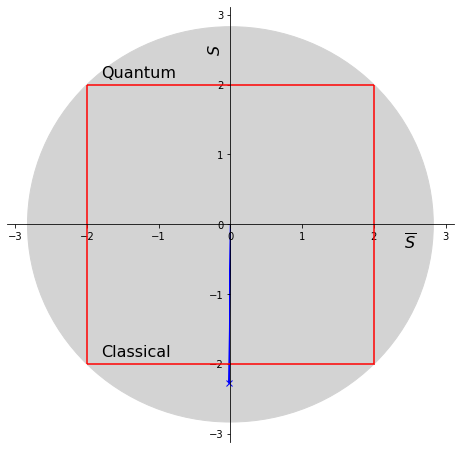

In [109]:
circle1 = plt.Circle((0, 0), 2*sqrt(2), color='lightgrey')
fig= plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.errorbar(S_,S,marker="x",c="b")
plt.hlines(2,-2,2, color="r")
plt.hlines(-2,-2,2, color="r")
plt.vlines(2,-2,2, color="r")
plt.vlines(-2,-2,2, color="r")

plt.gca().add_patch(circle1)
plt.fill_between([-2,2],-2,2, color="r")

ax.set_xlabel(r"$\overline{S}$",fontsize=16)
ticklab = ax.xaxis.get_ticklabels()[0]
trans = ticklab.get_transform()
ax.xaxis.set_label_coords(2.5, 0, transform=trans)

ax.set_ylabel(r"$S$",fontsize=16)
ticklab = ax.yaxis.get_ticklabels()[0]
trans = ticklab.get_transform()
ax.yaxis.set_label_coords(0, 2.5, transform=trans)

plt.arrow(0, 0, S_, S, color="b",head_width=0)
plt.annotate("Quantum",(-1.8,2.1),fontsize=16)
plt.annotate("Classical",(-1.8,-1.9),fontsize=16)

In [146]:
N=coin.sum()

In [165]:
ndelta=(abs(S)-2)/N**(1/2)
ndelta_=(abs(S_)-2)/N**(1/2)
n=((S**2+S_**2)**(1/2)-2)/N**(1/2)

print("{:.4} {:.4} {:.4}".format(ndelta, ndelta_, n))

0.0007457 -0.005365 0.0007459


In [164]:
poop=np.array([])
np.where(poop==1)[0].shape[0]==0

True